In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import sys

## 단순 선형 회귀 모델

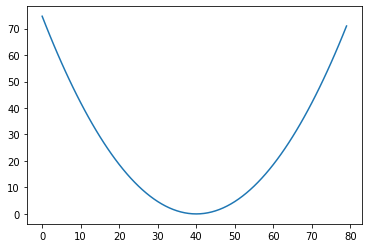

In [37]:
# 데이터 준비
x_train = [1,2,3]
y_train = [1,2,3]

W = tf.placeholder(tf.float32)

# 가설 준비(Wx + b)
hypot = W * x_train

# 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))
#------------------ 텐서플로우의 그래프 완성 ------------------#

# 비용함수를 그래프로 그려보기
sess = tf.Session()

cost_val = []
for i in range(-30, 50):
    result = sess.run(cost, feed_dict={W:i*0.1})
    cost_val.append(result)
    
plt.plot(cost_val)
sess.close()

## 경사하강 알고리즘을 이용한 가중치 학습

In [40]:
# 데이터 준비
x_train = [1,2,3]
y_train = [1,2,3]

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name='Weight')
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name='bias')

# 가설 준비(Wx + b)
hypot = W * x_train + b

# 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Desent)
gradient = tf.reduce_mean(tf.square((hypot - y_train)) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient)
update = W.assign(descent) # W = descent

############### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, weight, c = sess.run([update, W, cost])
    print(step, weight, c)
    
sess.close()

0 [0.7461744] 0.59532416
1 [0.69492537] 0.3500137
2 [0.6600923] 0.26602006
3 [0.63281864] 0.22292401
4 [0.6094312] 0.19708543
5 [0.5879545] 0.18045779
6 [0.56707615] 0.16968513
7 [0.5457183] 0.1633393
8 [0.52278745] 0.16105749
9 [0.49694908] 0.16334693
10 [0.46632236] 0.17180721
11 [0.42794475] 0.18990557
12 [0.37667677] 0.22494261
13 [0.30267364] 0.2931958
14 [0.18472877] 0.4349784
15 [-0.03041674] 0.76659876
16 [-0.50886345] 1.7059412
17 [-1.9710631] 5.3434963
18 [-9.844883] 29.702562
19 [-140.4569] 503.92136
20 [-24012.559] 92780.57


In [41]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name='Weight')
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name='bias')

# 가설 준비(Wx + b)
hypot = W * x_train + b

# 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Desent)
gradient = tf.reduce_mean((hypot - y_train) * x_train)
learning_rate = 0.1
descent = W - (learning_rate * gradient)
update = W.assign(descent) # W = descent

############### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    _, weight, c = sess.run([update, W, cost],
                            feed_dict = {x_train:[1,2,3,4,5],
                                         y_train:[1,2,3,4,5]})
    print(step, weight, c)
    
sess.close()

0 [0.8374008] 0.19224024
1 [0.8259559] 0.07435362
2 [0.8271004] 0.07317476
3 [0.82698596] 0.073163
4 [0.8269974] 0.07316288
5 [0.82699627] 0.07316289
6 [0.8269964] 0.073162876
7 [0.8269963] 0.07316285
8 [0.8269964] 0.07316288
9 [0.8269963] 0.07316285
10 [0.8269964] 0.07316288
11 [0.8269963] 0.07316285
12 [0.8269964] 0.07316288
13 [0.8269963] 0.07316285
14 [0.8269964] 0.07316288
15 [0.8269963] 0.07316285
16 [0.8269964] 0.07316288
17 [0.8269963] 0.07316285
18 [0.8269964] 0.07316288
19 [0.8269963] 0.07316285
20 [0.8269964] 0.07316288


In [42]:
######################### 경사하강 알고리즘 객체 사용 #############################

# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

# W는 1, bias는 1.1
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name='Weight')
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name='bias')

# 가설 준비(Wx + b)
hypot = W * x_train + b

# 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Desent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

############### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _, c, weight, bias = sess.run([train, cost, W, b],
                            feed_dict = {x_train:[1, 2, 3, 4, 5],
                                         y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})
    
    if step % 100 == 0:
        print(step, c, weight, bias)
    
sess.close()

0 86.44719 [-1.1035098] [-1.3984259]
100 86.44719 [-1.1035098] [-1.3984259]
200 86.44719 [-1.1035098] [-1.3984259]
300 86.44719 [-1.1035098] [-1.3984259]
400 86.44719 [-1.1035098] [-1.3984259]
500 86.44719 [-1.1035098] [-1.3984259]
600 86.44719 [-1.1035098] [-1.3984259]
700 86.44719 [-1.1035098] [-1.3984259]
800 86.44719 [-1.1035098] [-1.3984259]
900 86.44719 [-1.1035098] [-1.3984259]
1000 86.44719 [-1.1035098] [-1.3984259]
1100 86.44719 [-1.1035098] [-1.3984259]
1200 86.44719 [-1.1035098] [-1.3984259]
1300 86.44719 [-1.1035098] [-1.3984259]
1400 86.44719 [-1.1035098] [-1.3984259]
1500 86.44719 [-1.1035098] [-1.3984259]
1600 86.44719 [-1.1035098] [-1.3984259]
1700 86.44719 [-1.1035098] [-1.3984259]
1800 86.44719 [-1.1035098] [-1.3984259]
1900 86.44719 [-1.1035098] [-1.3984259]
2000 86.44719 [-1.1035098] [-1.3984259]


In [79]:
# 데이터 준비
x_train = tf.placeholder(tf.float32, shape=[None])
y_train = tf.placeholder(tf.float32, shape=[None])

# W는 1, bias는 1.1
W = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype=tf.float32, name="bias")

# 가설 준비
hypot = W * x_train + b 

# 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y_train))

# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

############### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(2001):
    _, c, weight, bias = sess.run([train, cost, W, b], 
                            feed_dict={x_train:[1, 2, 3, 4, 5], 
                                       y_train:[2.1, 3.1, 4.1, 5.1, 6.1]})

    if step % 100 == 0:
        print(step, c, weight, bias)

0 123.31606 [-0.652957] [-2.119943]
100 0.6125812 [1.506418] [-0.7283297]
200 0.31117138 [1.3609334] [-0.2030842]
300 0.15806499 [1.2572438] [0.17126803]
400 0.08029187 [1.1833425] [0.43807554]
500 0.040785633 [1.1306715] [0.62823427]
600 0.02071775 [1.0931319] [0.7637642]
700 0.010523917 [1.0663768] [0.86035866]
800 0.0053458037 [1.047308] [0.9292032]
900 0.0027154938 [1.0337172] [0.97827005]
1000 0.0013793816 [1.0240309] [1.0132409]
1100 0.00070067565 [1.0171272] [1.0381653]
1200 0.00035591016 [1.0122068] [1.0559297]
1300 0.00018079345 [1.0087] [1.06859]
1400 9.18385e-05 [1.0062007] [1.0776134]
1500 4.665282e-05 [1.0044193] [1.0840446]
1600 2.3696815e-05 [1.0031497] [1.0886284]
1700 1.2038642e-05 [1.0022451] [1.0918946]
1800 6.1155342e-06 [1.0016] [1.0942231]
1900 3.1064185e-06 [1.0011404] [1.0958829]
2000 1.5777312e-06 [1.0008129] [1.0970654]


In [80]:
# Testing
print(sess.run(hypot, feed_dict={x_train:[27]}))
print(sess.run(hypot, feed_dict={x_train:[2.5, 3.7]}))

[28.119013]
[3.5990977 4.800073 ]


In [2]:
# 아래의 데이터를 가지고 하루 시간을 일했을 때 매출액이 얼마인지 예측하시오.
x_data = [1,2,3,4,5,6,7]
y_data = [25000, 55000, 75000, 110000, 128000, 155000, 180000]

# 데이터 준비
X = tf.placeholder(tf.float32, shape=[None])
y = tf.placeholder(tf.float32, shape=[None])

W = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="Weight")
b = tf.Variable(tf.random_normal([1]), dtype = tf.float32, name="bias")

# 가설 준비
hypot = W * X + b

# 비용 함수
cost = tf.reduce_mean(tf.square(hypot - y))

# 최저 비용 학습을 위한 경사 하강 알고리즘(Gradient Descent)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

############### Graph 작업 완료

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3001):
    _, c, weight, bias = sess.run([train, cost, W, b],
                                 feed_dict={X:x_data, y:y_data})
    
    if step % 500 == 0:
        print(step, c, weight, bias)

0 13452760000.0 [10372.566] [2080.213]
500 8687798.0 [25537.244] [1951.5586]
1000 8633823.0 [25627.467] [1504.7822]
1500 8632674.0 [25640.615] [1439.6796]
2000 8632649.0 [25642.531] [1430.189]
2500 8632654.0 [25642.805] [1428.82]
3000 8632656.0 [25642.844] [1428.633]


In [3]:
print(sess.run(hypot, feed_dict={X:[8]}))
sess.close()

[206571.39]


### 다중 선형 회귀 모델

In [50]:
x1_data = [32.,93., 89.,96.,73.]
x2_data = [80.,88., 91.,98.,66.]
x3_data = [75.,93.,90.,100.,70.]
y_data = [152.,185., 180.,196.,142.]

#### 1) 단순하게 처리하는 경우

In [51]:
X1 = tf.placeholder(tf.float32, shape=[None])
X2 = tf.placeholder(tf.float32, shape=[None])
X3 = tf.placeholder(tf.float32, shape=[None])

y = tf.placeholder(tf.float32, shape=[None])

W1 = tf.Variable(tf.random_normal([1]), name='weight1')
W2 = tf.Variable(tf.random_normal([1]), name='weight2')
W3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

# 가설 설정
hypot = W1*X1 + W2*X2 + W3*X3 + b

# 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))


# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [52]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(9000):
       _, c, h = sess.run([train,cost,hypot],
                 feed_dict={X1:x1_data, X2:x2_data, X3:x3_data, y:y_data})
    
       if step%500 == 0:
            print(step, c, h)

0 41727.688 [ -1.1664314 -40.08628   -39.16159   -40.608463  -32.64044  ]
500 6.1639886 [151.34918 183.66347 181.18011 199.39265 138.03676]
1000 6.0938616 [151.21725 183.72324 181.15726 199.40538 138.08968]
1500 6.0309095 [151.21223 183.75159 181.11888 199.40361 138.10912]
2000 5.9699507 [151.21666 183.77718 181.07993 199.40079 138.12582]
2500 5.910994 [151.22171 183.80219 181.04155 199.39795 138.14207]
3000 5.853888 [151.22678 183.8268  181.0038  199.39516 138.15807]
3500 5.7986174 [151.23169 183.85097 180.96666 199.39236 138.17378]
4000 5.7450943 [151.2366  183.87476 180.93013 199.38965 138.18927]
4500 5.693339 [151.24136 183.89813 180.8942  199.38696 138.20448]
5000 5.643164 [151.2461  183.92114 180.85887 199.38431 138.21948]
5500 5.594636 [151.25073 183.94376 180.82411 199.3817  138.23422]
6000 5.5476313 [151.2553  183.966   180.78992 199.37912 138.24873]
6500 5.502118 [151.25981 183.98792 180.75632 199.3766  138.26303]
7000 5.458089 [151.26422 184.00943 180.72325 199.37411 138.277

#### 2) Matrix로 처리하는 경우

In [76]:
x_data = [[73., 80., 75.],
          [93., 88., 93.],
          [89., 91., 90.],
          [96., 98., 100.],
          [73., 66., 70.]]

y_data = [[152.], 
          [185.], 
          [180.], 
          [196.], 
          [142,]]

In [77]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[5, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight') # X와 y를 보고 잡기 (뒤에 3이랑 1)
b = tf.Variable(tf.random_normal([1]), name='bias')

# 가설 설정
hypot = tf.matmul(X,W) + b

# 비용 함수
cost = tf.reduce_mean(tf.square((hypot - y)))

# 최소 비용 계산
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [78]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(9000):
        _, c, h = sess.run([train, cost, hypot], feed_dict={X:x_data, y:y_data})
        
        if step % 500 == 0:
            print(step, c)
        
    print(h)

0 133155.73
500 1.8887007
1000 1.6843526
1500 1.5236897
2000 1.3964812
2500 1.294886
3000 1.2129333
3500 1.1460581
4000 1.090813
4500 1.0445116
5000 1.0051736
5500 0.9711753
6000 0.9413894
6500 0.91490966
7000 0.8910445
7500 0.8692485
8000 0.8491106
8500 0.8303415
[[152.3419 ]
 [184.22673]
 [181.19156]
 [194.82973]
 [142.74788]]


In [ ]:
# 메모리 (대용량 데이터 처리)
# 1. Quenue : LIFO(Last Input First Output)
#            데이터 넣을 때 enqueue
#            데이터 뺄 때 dequeue
# 2. Stack : FIFO(First Input First Output) 먼저 들어간게 먼저 나온다.

### DASK

+ 가상의 데이터프레임
+ 병렬 처리용 작업 스케줄러

In [55]:
%%writefile 'C:/Users/user/Documents/jun/AI/sample1.csv'
c1, c2, c3
1, 1.11, one
2, 2.22, two
3, 3.33, three

Writing C:/Users/user/Documents/jun/AI/sample1.csv


In [56]:
df1 = pd.read_csv('C:/Users/user/Documents/jun/AI/sample1.csv')
df1
df1[" c2"].mean()

2.22

In [57]:
import dask.dataframe as dd

In [58]:
df2 = dd.read_csv('C:/Users/user/Documents/jun/AI/sample1.csv')
df2
# 데이터의 메타정보만 읽어옴

,c1,c2,c3
npartitions=1,,,
,int64,float64,object
,...,...,...


In [59]:
df2.head()

C:\Users\user\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,1,1.11,one
1,2,2.22,two
2,3,3.33,three


In [60]:
df2[' c2'].mean() # 형식만 준비
df2[' c2'].mean().compute()

2.22

In [61]:
df3 = dd.read_csv('C:/Users/user/Documents/jun/AI/crime.csv', dtype=str, error_bad_lines=False, warn_bad_lines=False)

df3

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Historical Wards 2003-2015,Zip Codes,Community Areas,Census Tracts,Wards,Boundaries - ZIP Codes,Police Districts,Police Beats
npartitions=29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [62]:
df3.head()
df3.tail()
df3.count().compute()

ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [63]:
from dask.diagnostics import ProgressBar
pbar=ProgressBar()
pbar.register()


In [64]:
%%time
df3.count().compute()

[########################################] | 100% Completed |  1min 16.8s
Wall time: 1min 16s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [65]:
%%time
df3.count().compute(scheduler="processes", num_workers=8)

[########################################] | 100% Completed | 57.8s
Wall time: 58.2 s


ID                            6954279
Case Number                   6954275
Date                          6954279
Block                         6954279
IUCR                          6954279
Primary Type                  6954279
Description                   6954279
Location Description          6948835
Arrest                        6954279
Domestic                      6954279
Beat                          6954279
District                      6954232
Ward                          6339453
Community Area                6340784
FBI Code                      6954279
X Coordinate                  6888372
Y Coordinate                  6888372
Year                          6954279
Updated On                    6954279
Latitude                      6888372
Longitude                     6888372
Location                      6888372
Historical Wards 2003-2015    6868367
Zip Codes                     6888372
Community Areas               6871115
Census Tracts                 6873256
Wards       

In [66]:
%%time
(df2['c1'] + 3).compute()

[########################################] | 100% Completed |  0.1s
Wall time: 115 ms


0    4
1    5
2    6
Name: c1, dtype: int64

In [67]:
# c1 = df2['c1'] - 3
# df2 = c1

# df2 = de2['c1'] - 3
df2 = df2.assign(c1 = df2['c1'] - 3)

In [68]:
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\user\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3
0,-2,1.11,one
1,-1,2.22,two
2,0,3.33,three


In [69]:
########### 새로운 컬럼 추가
df2 = df2.assign(title=df2['c1'].astype(str) + '%')

In [70]:
df2.head()

[########################################] | 100% Completed |  0.1s


C:\Users\user\anaconda3\envs\tf1\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,c1,c2,c3,title
0,-2,1.11,one,-2%
1,-1,2.22,two,-1%
2,0,3.33,three,0%


In [71]:
########### 복수 개의 데이터 처리

In [73]:
%%writefile 'C:/Users/user/Documents/jun/AI/sample2.csv'
c1, c2, c3
4, 4.11, one
5, 5.22, two
6, 6.33, three

Writing C:/Users/user/Documents/jun/AI/sample2.csv


In [74]:
df4 = dd.read_csv('C:/Users/user/Documents/jun/AI/sample*.csv')

In [75]:
df4.count().compute()

[########################################] | 100% Completed |  0.1s


c1     6
 c2    6
 c3    6
dtype: int64

## QueueRunner

In [12]:
q = tf.FIFOQueue(20, "float") # queue의 길이와 저장될 데이터 형식
#enq_ops = q.enqueue_many(([1.0, 2.0, 3.0, 4.0],))
#qr = tf.train.QueueRunner(q, [enq_ops]*3)
#qr = tf.train.QueueRunner(q, [enq_ops, enq_ops, enq_ops])
# Queue 멀티 스레드 지원 (병렬수행가능), 위의 코드를 예로 들면 3개가 동시에 처리

enq_ops1 = q.enqueue_many(([1.0, 2.0, 3.0],))
enq_ops2 = q.enqueue_many(([4.0, 5.0, 6.0],))
enq_ops3 = q.enqueue_many(([7.0, 8.0, 9.0],))
qr = tf.train.QueueRunner(q, [enq_ops1, enq_ops2, enq_ops3])

sess = tf.Session()
coordi = tf.train.Coordinator()
threads = qr.create_threads(sess, coord=coordi, start=True)

for step in range(20):
    print(sess.run(q.dequeue()))
    
coordi.request_stop()
coordi.join(threads)
sess.close()

1.0
2.0
3.0
4.0
5.0
6.0
1.0
2.0
3.0
7.0
8.0
9.0
7.0
8.0
9.0
4.0
5.0
6.0
1.0
2.0


In [15]:
#################### 파일로부터 데이터를 읽어오기 ####################

filename_queue = tf.train.string_input_producer(['C:/Users/user/Documents/jun/AI/sample1.csv', 'C:/Users/user/Documents/jun/AI/sample2.csv'],
                                               shuffle=False, name='filename_queue')

reader = tf.TextLineReader()
key, value = reader.read(filename_queue)
# 줄 단위로 가져온 자료를 변환

recored_defaults = [[10], [0.0], ['null']]
# 디폴트값이 정의되면서 데이터 타입도 동시에 각각 정의됨
# [[0(정수)],[0.0(실수),['null'(문자)]]]
c1, c2, c3 = tf.decode_csv(value, record_defaults = recored_defaults, 
                           field_delim=",")

with tf.Session() as sess:
    coordi = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coordi)
    
    for i in range(30):
        print(sess.run([c1, c2, c3]))
        
    coordi.request_stop()
    coordi.join(threads)

[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']
[1, 1.11, b' one']
[2, 2.22, b' two']
[3, 3.33, b' three']
[4, 4.11, b' one']
[5, 5.22, b' two']
[6, 6.33, b' three']


In [16]:
############################ 슬라이스 소스 ############################

filename_queue = tf.train.string_input_producer(['C:/Users/user/Documents/jun/AI/data-01-test-score1.csv'])
key, value = tf.TextLineReader().read(filename_queue)
xy = tf.decode_csv(value, record_defaults=[[0.], [0.], [0.], [0.]])
xy

[<tf.Tensor 'DecodeCSV_3:0' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_3:1' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_3:2' shape=() dtype=float32>,
 <tf.Tensor 'DecodeCSV_3:3' shape=() dtype=float32>]

In [17]:
"""
BATCH
---------
- Batch : 전체 데이터
- Stochastic : 한 개의 데이터
- Mini Batch : Batch와 Stochastic의 절충안
"""

# 파일에 있는 데이터를 다 가져오는게 아니라 쪼개서 가져오는 (대용량일 경우 적용하기 좋음)

'\nBATCH\n---------\n- Batch : 전체 데이터\n- Stochastic : 한 개의 데이터\n- Mini Batch : Batch와 Stochastic의 절충안\n'

In [18]:
train_x_batch, train_y_batch = tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)
# batch_size=x : x개씩 끊어서 가져와라

Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.Dataset.batch(batch_size)` (or `padded_batch(...)` if `dynamic_pad=True`).


In [19]:
X = tf.placeholder(tf.float32, shape=[None, 3])
y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))

hypot = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypot-y))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=1e-5).minimize(cost)

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    coordi = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coordi)
    
    for step in range(2001):
        x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
        sess.run(train, feed_dict={X:x_batch, y:y_batch})
        
    coordi.request_stop()
    coordi.join(threads)
    
    print('당신의 성적은 : ', sess.run(hypot, feed_dict={X:[[100, 70, 101]]}))
    print('다른 사람의 성적은 : ',
         sess.run(hypot, feed_dict = {X:[[60,70,110],[90,100,80]]}))

당신의 성적은 :  [[183.39053]]
다른 사람의 성적은 :  [[184.35349]
 [176.13637]]


In [21]:
"""
전체 데이터갯수 : 200
batch_size : 5
ephoch의 갯수 : 1000
총 가중치 업데이트 횟수 => 40개(200/5)씩 1000번 = 40000번
"""

'\n전체 데이터갯수 : 200\nbatch_size : 5\nephoch의 갯수 : 1000\n총 가중치 업데이트 횟수 => 40개(200/5)씩 1000번 = 40000번\n'

## 로지스틱 회귀모델

In [5]:
x_data = [[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
y_data = [[0],[0],[0],[1],[1],[1]]

X = tf.placeholder(tf.float32, shape=[None,2])
y = tf.placeholder(tf.float32, shape=[None,1])

W = tf.Variable(tf.random_normal([2,1]))
b = tf.Variable(tf.random_normal([1]))

# 가설
hypot = tf.sigmoid(tf.matmul(X,W) + b)

# 비용 함수
cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))

# 최소비용
train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)




In [6]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(10001):
    sess.run(train, feed_dict={X:x_data, y:y_data})

In [11]:
# 정확도 측정
pred = tf.cast(hypot>0.5, dtype=tf.float32)
accuracy = tf.equal(pred, y)

<tf.Tensor 'Equal_3:0' shape=(?, 1) dtype=bool>

In [8]:
# 예측 실행
sess.run([hypot,pred, accuracy], feed_dict={X:x_data, y:y_data})

[array([[0.02956051],
        [0.1572166 ],
        [0.29917198],
        [0.7839961 ],
        [0.94121045],
        [0.9807192 ]], dtype=float32),
 array([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([[ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True]])]

In [32]:
# conda clean --all

### softmax Classifier

In [34]:
x_data = [[1, 2, 1, 1], [2, 1, 3, 2], [3, 1, 3, 4], [4, 1, 5, 5], [1, 7, 5, 5], 
                                                        [1, 2, 5, 6], [1, 6, 6, 6], [1, 7, 7, 7]]
y_data = [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0]]



In [43]:
X = tf.placeholder(tf.float32, shape = [None, 4])
y = tf.placeholder(tf.float32, shape = [None, 3])

W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))

# 가설 준비
hypot = tf.nn.softmax(tf.matmul(X,W) + b)

cost = -tf.reduce_mean(y * tf.log(hypot) + (1 - y) * tf.log(1 - hypot))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [45]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2001):
        _, c = sess.run([train, cost], feed_dict={X:x_data, y:y_data})
        #if step%500 == 0:
        #    print(step, cost)
        
    #테스트
    result = sess.run(hypot, feed_dict={X:[[1, 11, 7, 9]]})
    print(result)
    print(sess.run(tf.arg_max(result, 1)))

[[8.063767e-03 9.918864e-01 4.984265e-05]]
[1]
